In [15]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta



# Main source for the training data
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
# Local file
DATA_FILE = 'data/OxCGRT_latest.csv'
#Demographics File
DEMOGRAPHICS_FILE = 'data/Country_Demographics.csv'
DEMOGRAPHICS_BRZ_R_FILE = 'data/brz_region_demo.csv'

# Load historical data from local file
df = pd.read_csv(DATA_FILE, 
                 parse_dates=['Date'],
                 encoding="ISO-8859-1",
                 dtype={"RegionName": str,
                        "RegionCode": str},
                 error_bad_lines=False)

#Data from Worldometers - https://www.worldometers.info/world-population/population-by-country/
demographics = pd.read_csv(DEMOGRAPHICS_FILE,
                 sep = ';',
                 encoding="ISO-8859-1",
                 dtype={"Country": str,
                        "Population": int},
                 error_bad_lines=False)


#variable to iterate on top for each country
country = ("Aruba","Afghanista","Angol","Albani","Andorra"","\
                "United Arab Emirate","Argentin","Australia","Austria"","\
                "Azerbaijan","Burundi","Belgium","Benin","Burkina Faso","Bangladesh"","\
                "Bulgaria","Bahrain","Bahamas","Bosnia and Herzegovina","Belarus"","\
                "Belize","Bermuda","Bolivia","Brazil","Barbados","Brunei","Bhutan"","\
                "Botswana","Central African Republic","Canada","Switzerland"","\
                "Chile","China","Cote d'Ivoire","Cameroon","Democratic Republic of Congo","\
                Congo","Colombia","Comoros","Cape Verde","Costa Rica","Cuba","Cyprus","Czech Republic","\
                Germany","Djibouti","Dominica","Denmark","Dominican Republic","Algeria","Ecuador","Egypt","\
                Eritrea","Spain","Estonia","Ethiopia","Finland","Fiji","France","Faeroe Islands","\
                Gabon","United Kingdom","Georgia","Ghana","Guinea","Gambia","Greece","Greenland","\
                Guatemala","Guam","Guyana","Hong Kong","Honduras","Croatia","Haiti","Hungary","Indonesia","\
                India","Ireland","Iran","Iraq","Iceland","Israel","Italy","Jamaica","Jordan","Japan","Kazakhstan","\
                Kenya","Kyrgyz Republic","Cambodia","South Korea","Kuwait","Laos","Lebanon","Liberia","Libya","\
                Sri Lanka","Lesotho","Lithuania","Luxembourg","Latvia","Macao","Morocco","Monaco","Moldova","\
                Madagascar","Mexico","Mali","Malta","Myanmar","Mongolia","Mozambique","Mauritania","Mauritius","\
                Malawi","Malaysia","Namibia","Niger","Nigeria","Nicaragua","Netherlands","Norway","Nepal","New Zealand","\
                Oman","Pakistan","Panama","Peru","Philippines","Papua New Guinea","Poland","Puerto Rico","Portugal","\
                Paraguay","Palesine","Qatar","Kosovo","Romania","Russia","Rwanda","Saudi Arabia","Sudan","Senegal","\
                Singapore","Solomon Islands","Sierra Leone","El Salvador","San Marino","Somalia","Serbia","\
                South Sudan","Suriname","Slovak Republic","Slovenia","Sweden","Eswatini","Seychelles","Syria","\
                Chad","Togo","Thailand","Tajikistan","Turkmenistan","Timor-Leste","Tonga","Trinidad and Tobago","\
                Tunisia","Turkey","Taiwan","Tanzania","Uganda","Ukraine","Uruguay","United States","Uzbekistan","\
                Venezuela","United States Virgin Islands","Vietnam","Vanuatu","Yemen","South Africa","Zambia","Zimbabwe")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
df.set_index('CountryName').filter(like='South Korea',axis=0) 
df=demographics.join(df.set_index('CountryName'),on='Country',how='inner',lsuffix='Country',rsuffix='CountryName')
 

In [17]:
CASES_COLUMNS = ["Country", "Population", "RegionName", "Date", "ConfirmedCases", "ConfirmedDeaths"]


italy_data = df.query('Country == "South Korea" \
                         & ConfirmedCases!=""\
                         & ConfirmedCases!="0"\
                         & ConfirmedCases!="NaN"')[CASES_COLUMNS]
 

### add time series
s = S/N , i = I/N, r = R/N
s+i+r = 1
I+R = ConfirmedCases + ConfirmedDeaths

In [18]:
# s = N-confirmedCases (assume population ins constant)
# need to check whether death needs to be removed
italy_data['s']=(italy_data['Population']-italy_data['ConfirmedCases'])/italy_data['Population']
#susceptible_list = italy_data['Population']-italy_data['ConfirmedCases']
#italy_data.loc[:,'Susceptible'] = pd.Series(susceptible_list, index=italy_data.index)
italy_data['NewInfected']= italy_data['ConfirmedCases'].diff()
italy_data['i'] =italy_data['ConfirmedCases']/italy_data['Population']

italy = np.zeros([italy_data.shape[0],2])
italy[0:,0] = np.arange(0,italy_data.shape[0]).astype(int)
italy[0:,1] = italy_data["i"]  


# start from day 200
np.savetxt("data/italy.csv", italy[200:  ,:], delimiter=",")

In [19]:
# import SIR, ParticleSIR classes from models.py
from models import *

#Model Parameters
num_particles = 500#50
ens = num_particles
year = '2019-20'
file = 'italy' #CDC filename
path = 'Particle_Filter'

#date = np.array(['1','2'])
#date[0] = '2020-08-01'
#date[1] = '2020-08-04'
#path = '%s_%s_predictions_example' % (date[0],date[1])

#Set parameters  
params = {} #read_params('./data/params/params2019-20.csv')
params['alpha'] = .1  #beta 
params['beta'] =  0.03  #gamma
params['CDC'] = f'./data/{file}.csv'
params['filtering'] =True
params['time_varying'] =True
dat = get_data(params['CDC'])
params['epochs'] = dat.shape[0] #+ date_diff#   
params['init_i'] = dat[0]
#Created to flexibilize the amount of days


sir = ParticleSIR(num_particles, params)

initialize BaseSIR
call SIR.fit
alpha: 0.1
n epochs 141 epoch 0 refit True
intialize particle filter
initialize SIR
ParticleSIR initialized


141
./data/italy.csv
A1 (500,)
weight: (500,) n_weight 0.9999999999999999 curr weight 0.9999999999999999
A1 (500,)
weight: (500,) n_weight 0.9999999999999998 curr weight 0.9999999999999998
A1 (500,)
weight: (500,) n_weight 1.0000000000000002 curr weight 1.0000000000000002
A1 (500,)
weight: (500,) n_weight 1.0 curr weight 1.0
A1 (500,)
index 1 resamples
weight: (500,) n_weight 0.9999999999999999 curr weight 1.0000000000000004
A1 (500,)
weight: (500,) n_weight 1.0 curr weight 1.0
A1 (500,)
weight: (500,) n_weight 1.0 curr weight 1.0
A1 (500,)
index 1 resamples
weight: (500,) n_weight 1.0 curr weight 1.0000000000000004
A1 (500,)
weight: (500,) n_weight 0.9999999999999999 curr weight 0.9999999999999999
A1 (500,)
weight: (500,) n_weight 0.9999999999999999 curr weight 0.9999999999999999
A1 (500,)
index 1 resamples
weight: (500,) n_weight 1.0 curr weight 1.0000000000000004
A1 (500,)
weight: (500,) n_weight 1.0 curr weight 1.0
A1 (500,)
weight: (500,) n_weight 1.0 curr weight 1.0
A1 (500,)
ind

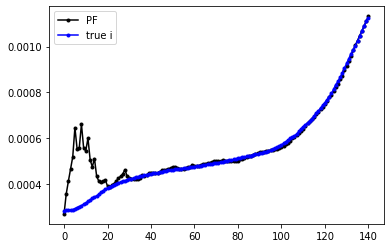

In [20]:
print(dat.shape[0])
print(params['CDC'])
sir.predict_with_filter(params)

pprint(sir.scores)


import matplotlib.pyplot as plt

x =   np.arange(0,len(sir.Is))
y = sir.IS
y_true =sir.CDC_obs

p1, = plt.plot(x,  y, '.-', color='black',label='PF');

p2, = plt.plot(x,y_true, '.-',color='blue',label='true i')
plt.legend()

0.0005703622694924807
0.0005469814037446049


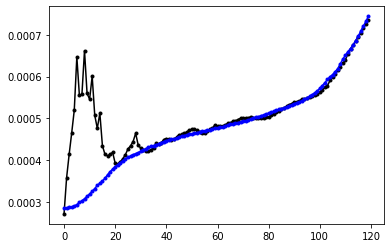

In [21]:
plt.plot(x[ :120],  y[:120], '.-', color='black');
plt.plot(x[:120],y_true[:120], '.-',color='blue')

print(np.mean(y))
print(np.mean(y_true))

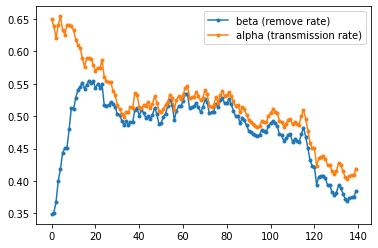

In [22]:
plt.plot(sir.beta_list,'.-',label='beta (remove rate)')
plt.plot(sir.alpha_list,'.-',label='alpha (transmission rate)')
plt.legend()